In [15]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt



In [11]:
feature_data = pd.read_csv("features_only.csv")

In [9]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 7,
}

In [79]:
intertia = []
silhouette_coef = []

for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(feature_data)
    intertia.append(kmeans.inertia_)

    if (k != 1):
        silhouette_coef.append(silhouette_score(feature_data, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10


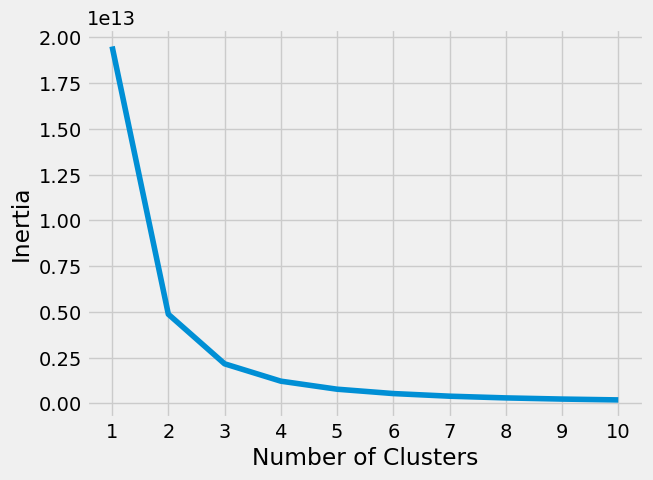

In [82]:
plt.plot(range(1, 11), intertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [84]:
kl = KneeLocator(
    range(1, 11), intertia, curve="convex", direction="decreasing"
)

print(kl.elbow)

3


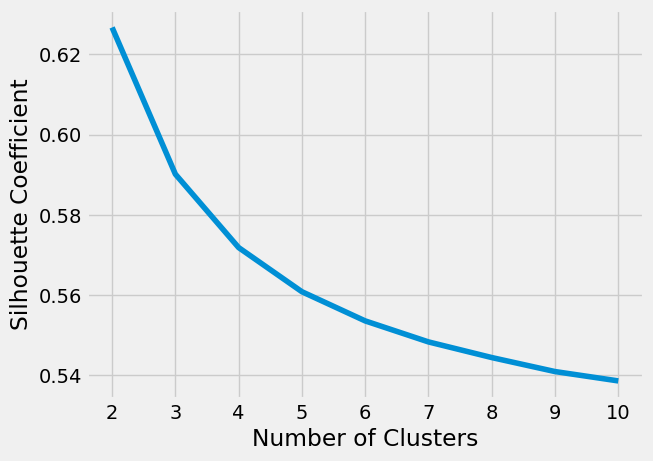

In [85]:
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(feature_data)

kmeans_3_centers = {
    "centers": kmeans.cluster_centers_,
    "labels": kmeans.labels_,
    "intertia": kmeans.inertia_,
    "iterations": kmeans.n_iter_,
    "features": kmeans.n_features_in_,
    "feature names": kmeans.feature_names_in_
}

In [98]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

In [100]:
labeled_data = pd.read_csv("cleaned.csv")


print(parse_tags(labeled_data._get_value(12, "seeds")))

['aggressive', 'angry', 'driving', 'energetic']


In [101]:
tags_represented = {
    0: {},
    1: {},
    2: {}
}

for i in np.unique(kmeans_3_centers["labels"]):
    indices = np.where(kmeans_3_centers["labels"] == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

In [102]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

print(cluster_zero)


{'bravado': 1, 'funereal': 1, 'circular': 1, 'effervescent': 1, 'sprawling': 1, 'sugary': 1, 'mighty': 1, 'thrilling': 1, 'knotty': 1, 'motoric': 1, 'meandering': 1, 'weary': 1, 'graceful': 1, 'feverish': 2, 'gutsy': 2, 'raucous': 2, 'perky': 2, 'ebullient': 2, 'greasy': 2, 'understated': 2, 'thuggish': 2, 'narcotic': 2, 'dignified': 2, 'stately': 2, 'irreverent': 3, 'monastic': 3, 'anxious': 3, 'transparent': 3, 'plaintive': 3, 'rowdy': 3, 'hedonistic': 4, 'springlike': 4, 'jovial': 4, 'marching': 4, 'good-natured': 4, 'nervous': 4, 'austere': 4, 'shimmering': 5, 'reverent': 5, 'reassuring': 5, 'street-smart': 5, 'tense': 6, 'searching': 6, 'desperate': 6, 'ramshackle': 6, 'resolute': 6, 'druggy': 6, 'trashy': 6, 'wintry': 7, 'laid-back': 7, 'swaggering': 7, 'amiable': 7, 'indulgent': 8, 'ornate': 8, 'rollicking': 8, 'messy': 8, 'elegiac': 8, 'bombastic': 9, 'technical': 9, 'child-like': 9, 'gleeful': 9, 'giddy': 9, 'sparkling': 10, 'boisterous': 11, 'celebratory': 12, 'tragic': 12, '

In [103]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

print(cluster_one)

{'reassuring': 1, 'giddy': 1, 'marching': 1, 'opulent': 1, 'effervescent': 1, 'dignified': 1, 'capricious': 1, 'resolute': 2, 'perky': 2, 'agreeable': 2, 'mighty': 2, 'reverent': 2, 'hungry': 2, 'noble': 2, 'gleeful': 3, 'athletic': 3, 'jittery': 3, 'child-like': 3, 'monastic': 3, 'regretful': 3, 'springlike': 4, 'indulgent': 4, 'outraged': 4, 'weary': 4, 'stately': 4, 'greasy': 5, 'naive': 5, 'understated': 5, 'narcotic': 5, 'hedonistic': 6, 'threatening': 7, 'ramshackle': 7, 'campy': 7, 'graceful': 7, 'rustic': 7, 'spicy': 8, 'sugary': 8, 'sparkling': 9, 'bravado': 9, 'mechanical': 9, 'celebratory': 9, 'shimmering': 10, 'funereal': 10, 'languid': 10, 'rollicking': 11, 'nervous': 11, 'irreverent': 12, 'thuggish': 12, 'thrilling': 12, 'knotty': 12, 'suffocating': 12, 'distraught': 13, 'circular': 13, 'insular': 13, 'meandering': 13, 'restrained': 13, 'clinical': 13, 'sleazy': 14, 'elegiac': 14, 'boisterous': 14, 'snide': 14, 'trashy': 16, 'bombastic': 16, 'monumental': 17, 'rowdy': 17,

In [104]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

print(cluster_two)

{'ebullient': 1, 'athletic': 1, 'consoling': 1, 'translucent': 2, 'sprightly': 2, 'dignified': 2, 'springlike': 3, 'jittery': 3, 'funereal': 4, 'amiable': 4, 'effervescent': 4, 'distraught': 4, 'regretful': 5, 'gutsy': 6, 'swaggering': 8, 'thuggish': 8, 'noble': 8, 'irreverent': 9, 'boisterous': 9, 'celebratory': 9, 'meandering': 9, 'rambunctious': 10, 'sugary': 11, 'stately': 12, 'greasy': 12, 'transparent': 12, 'understated': 13, 'circular': 13, 'wintry': 14, 'marching': 14, 'good-natured': 15, 'street-smart': 15, 'bravado': 16, 'raucous': 17, 'rollicking': 17, 'sprawling': 17, 'kinetic': 21, 'narcotic': 25, 'weary': 26, 'plaintive': 27, 'mighty': 29, 'reassuring': 29, 'rowdy': 29, 'exuberant': 31, 'child-like': 32, 'fiery': 33, 'searching': 34, 'graceful': 38, 'anxious': 39, 'elegiac': 40, 'perky': 40, 'thrilling': 51, 'trashy': 57, 'tense': 61, 'sparkling': 66, 'druggy': 66, 'messy': 66, 'airy': 71, 'shimmering': 71, 'nervous': 74, 'confident': 78, 'precious': 78, 'naive': 82, 'inn